In [ ]:
%matplotlib inline

## YOLO

In [ ]:
from src.hpe.common.mutators import convert_to_bgr
from src.hpe.common.metrics import calc_precision_and_recall, calc_mean_average_precision
from src.hpe.yolo.performance import DistanceCollector, PerformanceLogger, EstimationCollector, \
    read_distances, read_estimations

from src.hpe.common.plot import plot_precision_recall_curve
from src.hpe.yolo.plot import plot_yolo_average_distances

### Distances

In [ ]:
# default estimation
collector = DistanceCollector()
distances = collector.collect(name="distances")

In [ ]:
# estimation on bgr images
distances_bgr = collector.collect(
    name="distances_bgr",
    image_mutators=[convert_to_bgr]
)

In [ ]:
distances = read_distances()
distances_bgr = read_distances(dataset_name="distances_bgr")

### Performance log

In [ ]:
logger = PerformanceLogger()
logger.collect(name="Yolov11m-pose")

In [ ]:
# calculate and log performance on bgr images
logger.collect(
    name="Yolov11m-pose on bgr",
    image_mutators=[convert_to_bgr]
)

### Estimations

In [ ]:
collector = EstimationCollector()

In [ ]:
estimations = collector.collect(name="estimations")

In [ ]:
estimations_bgr = collector.collect(
    name="estimations_bgr", 
    image_mutators={convert_to_bgr})

In [ ]:
estimations = read_estimations()
estimations_bgr = read_estimations(name="estimations_bgr")

In [ ]:
pnr = calc_precision_and_recall(estimations)
mAP = calc_mean_average_precision(pnr)
print(f"Mean Average Precision = {mAP}")

In [ ]:
pnr_bgr = calc_precision_and_recall(estimations_bgr)
mAP_bgr = calc_mean_average_precision(pnr_bgr)
print(f"Mean Average Precision = {mAP_bgr}")

### plots

In [ ]:
plot_yolo_average_distances(distances=distances)

In [ ]:
plot_yolo_average_distances(distances=distances_bgr)

In [ ]:
plot_precision_recall_curve(pnr)

In [ ]:
plot_precision_recall_curve(pnr_bgr)

In [ ]:
from src.hpe.yolo.play import play_with_hpe as play_with_yolo_hpe
from glob import glob
from random import choice

video_paths = glob("data/samples/**/*.*")
video_path = choice(video_paths)

play_with_yolo_hpe(video_path)

## MediaPipe

In [ ]:
from src.hpe.common.mutators import convert_to_bgr
from src.hpe.common.metrics import calc_precision_and_recall, calc_mean_average_precision
from src.hpe.mp.performance import DistanceCollector, PerformanceLogger, EstimationCollector, read_distances, read_estimations

from src.hpe.common.plot import plot_precision_recall_curve
from src.hpe.mp.plot import plot_mediapipe_average_distances

### Distances

In [3]:
collector = DistanceCollector()

In [4]:
distances = collector.collect(name="distances")

libEGL warning: DRI3: Screen seems not DRI3 capable
libEGL warning: DRI3: Screen seems not DRI3 capable
MESA: error: ZINK: failed to choose pdev
libEGL warning: egl: failed to create dri2 screen
I0000 00:00:1760428509.800487 1244062 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1760428509.854620 1250442 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: D3D12 (NVIDIA TITAN RTX)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1760428510.238339 1250367 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428512.343693 1250369 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428512.358653 1250368 inference_feedback_manager.cc:114] Feedback manager requires a model with a single s

Distances saved to 'data/hpe/mediapipe/distances.pkl'


W0000 00:00:1760428571.486919 1253084 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428571.498613 1253125 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428571.499358 1253111 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428571.504628 1253085 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428571.508168 1253146 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428571.508925 1253093 inference_feedback_manager.cc:114] Feedback manager 

In [5]:
# estimation on bgr images
distances_bgr = collector.collect(
    name="distances_bgr",
    image_mutators=[convert_to_bgr]
)

I0000 00:00:1760428911.059976 1244062 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1760428911.086849 1255178 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: D3D12 (NVIDIA TITAN RTX)
W0000 00:00:1760428911.348747 1255115 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428912.414699 1255116 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428912.427469 1255154 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428912.427773 1255153 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:

Distances saved to 'data/hpe/mediapipe/distances_bgr.pkl'


W0000 00:00:1760428969.846791 1257817 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428969.859184 1257847 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428969.859434 1257836 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428969.866816 1257817 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428969.870380 1257835 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760428969.873434 1257871 inference_feedback_manager.cc:114] Feedback manager 

In [ ]:
distances = read_distances()
distances_bgr = read_distances(dataset_name="distances_bgr")

### Performance log

In [ ]:
logger = PerformanceLogger()

In [ ]:
logger.collect(name="MediaPipe")

I0000 00:00:1760429262.048588 1244062 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1760429262.078437 1259592 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: D3D12 (NVIDIA TITAN RTX)
W0000 00:00:1760429262.333434 1259524 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429263.375395 1259525 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429263.387342 1259551 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429263.387405 1259561 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:

Percentage of landmarks detected correctly: 0.4882301656495205%
MediaPipe can only detect 31 landmarks of our 32 labels


W0000 00:00:1760429323.023021 1262229 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429323.034790 1262283 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429323.035092 1262282 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429323.040215 1262284 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429323.044574 1262239 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429323.046217 1262286 inference_feedback_manager.cc:114] Feedback manager 

In [7]:
logger.collect(name="MediaPipe on bgr",
    image_mutators=[convert_to_bgr])

I0000 00:00:1760429345.078266 1244062 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1760429345.109369 1262496 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: D3D12 (NVIDIA TITAN RTX)
W0000 00:00:1760429345.372416 1262431 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429346.390630 1262432 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429346.403205 1262440 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429346.405208 1262449 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:

Percentage of landmarks detected correctly: 0.12728857890148212%
MediaPipe on bgr can only detect 31 landmarks of our 32 labels


W0000 00:00:1760429403.692920 1265120 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429403.704999 1265155 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429403.705110 1265156 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429403.710369 1265123 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429403.714321 1265141 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429403.715090 1265180 inference_feedback_manager.cc:114] Feedback manager 

### Estimations

In [9]:
collector = EstimationCollector()

In [10]:
estimations = collector.collect(name="estimations")

I0000 00:00:1760429852.231357 1244062 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1760429852.258199 1267815 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: D3D12 (NVIDIA TITAN RTX)
W0000 00:00:1760429852.525988 1267752 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429853.622583 1267750 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429853.635620 1267777 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1760429853.635858 1267751 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:

In [13]:
pnr = calc_precision_and_recall(estimations)
mAP = calc_mean_average_precision(pnr)
print(f"Mean Average Precision = {mAP}")

Mean Average Precision = 0.1379019122378197


/mnt/c/Projects/climbing-technique-detector/src/hpe/common/metrics.py:136: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result[idx] = landmark_precisions


In [ ]:
estimations_bgr = collector.collect(
    name="estimations_bgr", 
    image_mutators={convert_to_bgr})

In [ ]:
estimations = read_estimations(name="estimations")
estimations_bgr = read_estimations(name="estimations_bgr")

### Plots

In [ ]:

plot_mediapipe_average_distances(distances=distances)

In [ ]:
plot_mediapipe_average_distances(distances=distances_bgr)

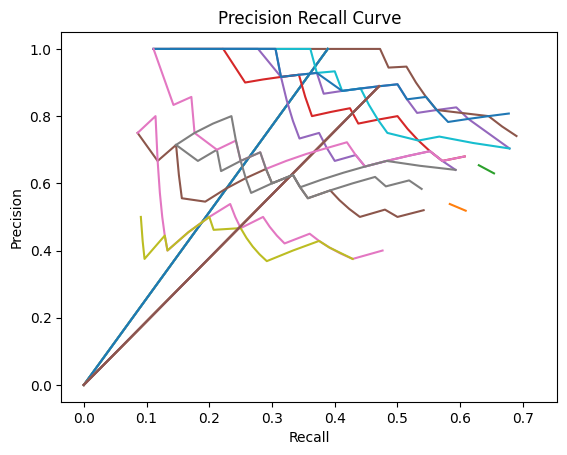

In [14]:
plot_precision_recall_curve(pnr)

In [ ]:
from src.hpe.mp.play import play_with_hpe
from glob import glob
from random import choice

video_paths = glob("data/samples/**/*.*")
video_path = choice(video_paths)

play_with_hpe(video_path)

## Comparison

In [ ]:
from src.hpe.yolo.performance import read_distances as read_yolo_distances
from src.hpe.mp.performance import read_distances as read_mp_distances
from src.hpe.common.plot import plot_distances_boxplot

In [ ]:
mp_dist = read_mp_distances(dataset_name="distances")
mp_bgr_dist = read_mp_distances(dataset_name="distances_bgr")

yolo_dist = read_yolo_distances(dataset_name="distances")
yolo_bgr_dist = read_yolo_distances(dataset_name="distances_bgr")

In [ ]:
plot_distances_boxplot(
    None,
    ("MediaPipe", mp_dist),
    ("MediaPipe on bgr", mp_bgr_dist),
    ("Yolov11", yolo_dist),
    ("Yolov11 on bgr", yolo_bgr_dist))

In [ ]:
plot_distances_boxplot(
    (0, 10),
    ("MediaPipe", mp_dist),
    ("MediaPipe on bgr", mp_bgr_dist),
    ("Yolov11", yolo_dist),
    ("Yolov11 on bgr", yolo_bgr_dist))